# Projeto: Séries temporais - MBA

Observações:

1. Para cada questão, crie novas células para efetuar seus códigos. 

2. Nomear variáveis de acordo com o contexto da questão. 

3. Caso necessário, utilize novas caixas de textos para deixar comentários. 

Prof. Jorge Luiz 

jorgearaujo@unifor.br

1. Você recebeu um dataset chamado 'Electric_Production.csv'. Ele apresenta os dados de produção elétrica em diversos momentos. Crie um dataframe df com este dado. 



a. Como a produção evoluiu no tempo ? Crie gráficos apresentando algumas médias móveis.

b. O dado é estacionário?

c. O dado apresenta uma distribuição normal?


2. Você recebeu um dataset chamado 'movimentacao_rodoviaria.csv'. Ele apresenta a quantidade de pessoas estimadas nas rodoviárias. Crie um dataframe df com este dado. 

a. Crie gráficos temporal apresentando algumas médias móveis.

b. O dado é estacionário?

c. O dado apresenta uma distribuição normal?



# Dica de Solução

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 

## Questão 1

In [2]:
df=pd.read_csv('Electric_Production.csv')

In [3]:
df

,DATE,IPG2211A2N
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151
...,...,...
392,9/1/2017,98.6154
393,10/1/2017,93.6137
394,11/1/2017,97.3359
395,12/1/2017,114.7212


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DATE        397 non-null    object 
 1   IPG2211A2N  397 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.3+ KB


In [5]:
df['DATE']=pd.to_datetime(df['DATE'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   DATE        397 non-null    datetime64[ns]
 1   IPG2211A2N  397 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 6.3 KB


In [7]:
df.set_index('DATE',inplace=True)

In [8]:
df.head()

,IPG2211A2N
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


# Média Móvel Simples

In [9]:
df.rolling(3).mean().head(10)

,IPG2211A2N
DATE,
1985-01-01,NaN
1985-02-01,NaN
1985-03-01,68.542467
1985-04-01,63.531200
1985-05-01,58.412233
1985-06-01,56.958967
1985-07-01,58.675233
1985-08-01,61.319700
1985-09-01,62.151100


# MME

In [10]:
df.ewm(alpha=0.5).mean()

,IPG2211A2N
DATE,
1985-01-01,72.505200
1985-02-01,71.283067
1985-03-01,66.235714
1985-04-01,61.561413
1985-05-01,58.337510
...,...
2017-09-01,102.808570
2017-10-01,98.211135
2017-11-01,97.773517


# Grafico

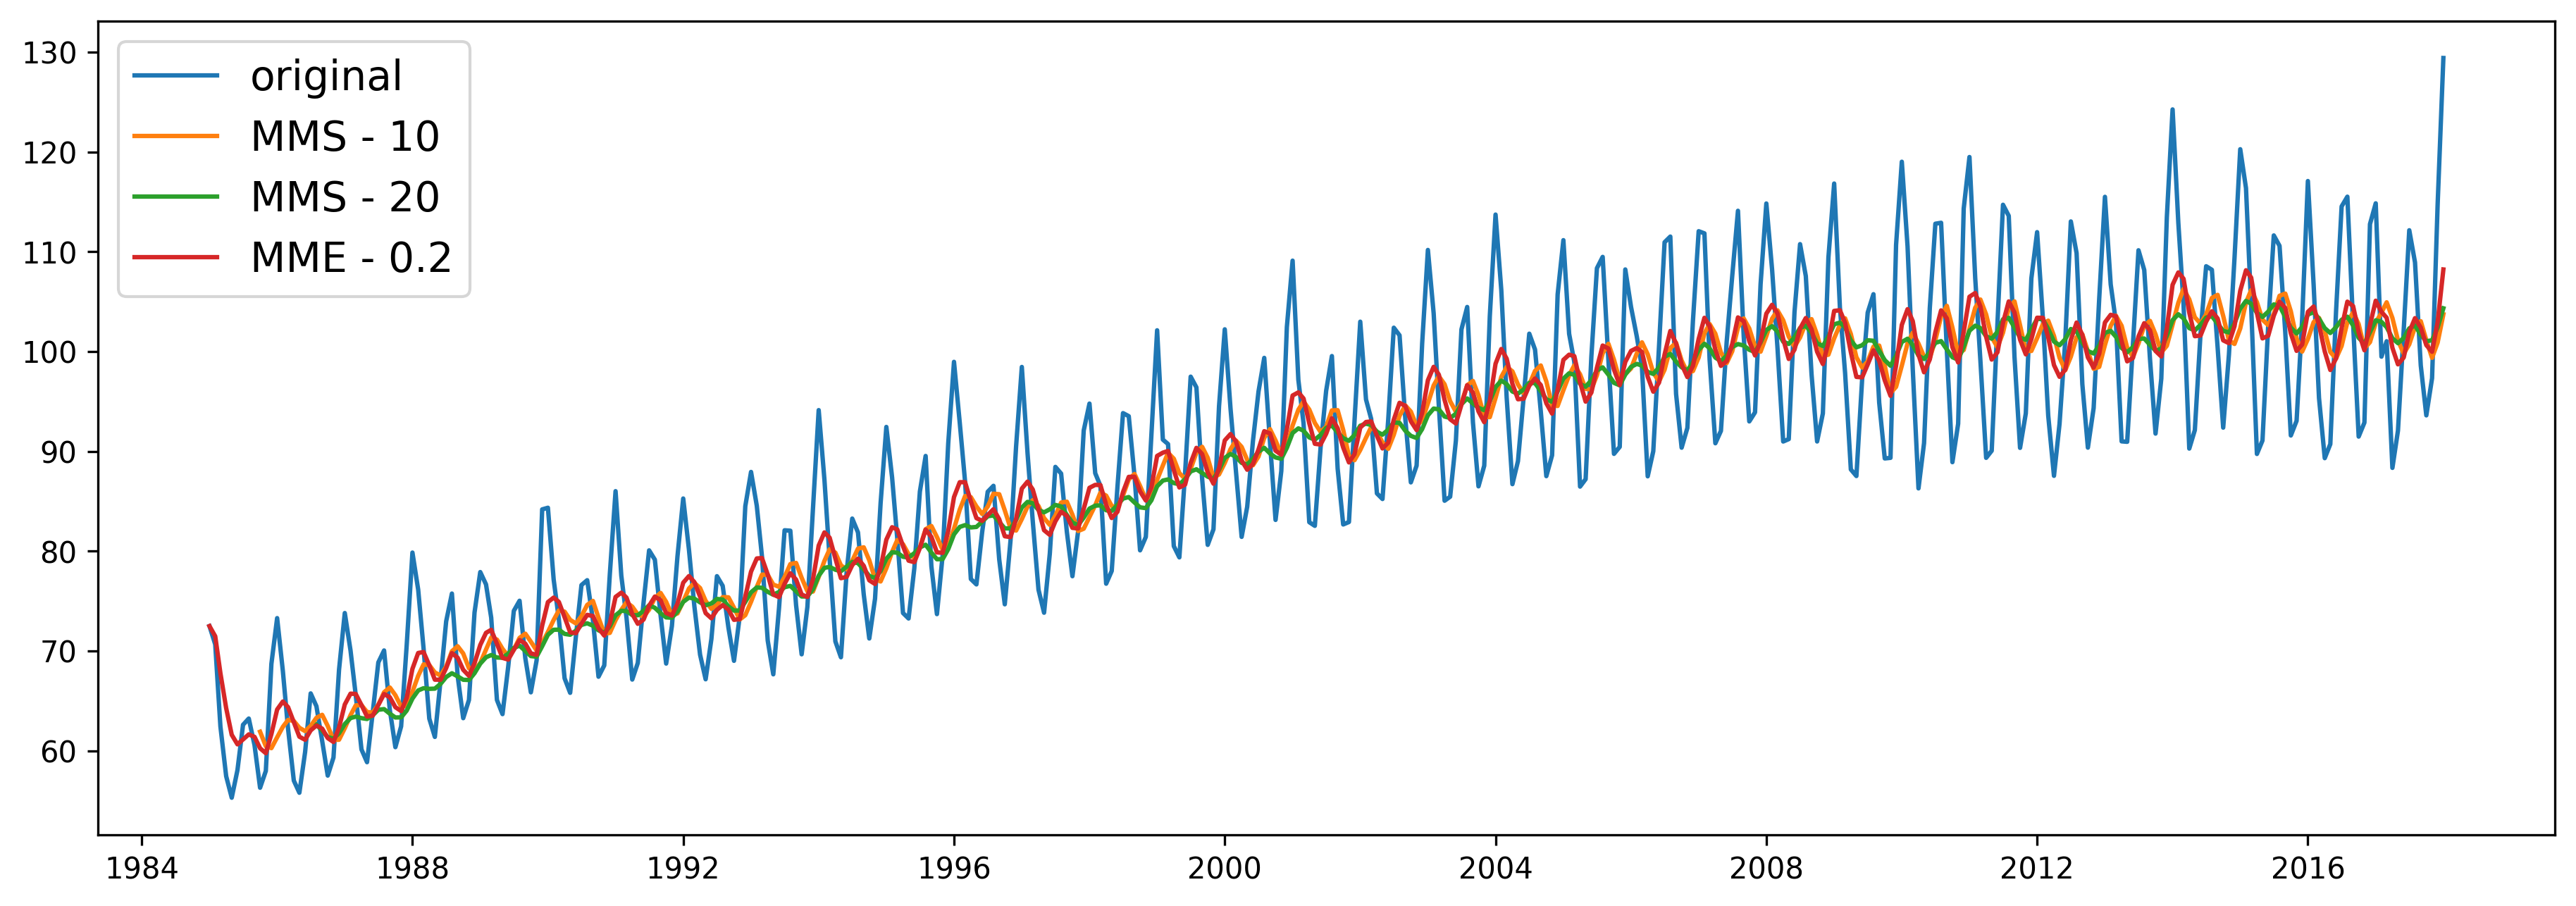

In [11]:
plt.figure(figsize=(15,5),dpi=300)
plt.plot(df,label='original')
plt.plot(df.rolling(10).mean(),label='MMS - 10')
plt.plot(df.rolling(20).mean(),label='MMS - 20')
plt.plot(df.ewm(alpha=0.2).mean(),label='MME - 0.2')
plt.legend(fontsize=14)

## b. O dados é estacionário?

In [12]:
from statsmodels.tsa.stattools import kpss

def is_stationary(xx):
    kpssx=kpss(xx)
    valorcritico=kpssx[3]['5%']
    teste=kpssx[0]
    if teste > valorcritico:
        texto='A série NÃO é estacionária'
    else:
        texto="A série É estacionária"
        
    return texto

In [13]:
is_stationary(df.values)

/var/folders/hh/sy5ws2px2632l4y5ft5fb97r0000gp/T/ipykernel_26204/3090872550.py:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpssx=kpss(xx)


'A série NÃO é estacionária'

## c. O dado apresenta uma distribuição normal?

In [14]:
import scipy.stats as stats

def testenormal(x):
    e,p=stats.shapiro(x)
    texto="A série NÃO é normal"
    if p>0.05:
        texto="A série É é normal"
    return texto

In [15]:
testenormal(df.values)

'A série NÃO é normal'

## Questão 2

### Você recebeu um dataset chamado 'movimentacao_rodoviaria.csv'. Ele apresenta a quantidade de pessoas estimadas nas rodoviárias. Crie um dataframe df com este dado. 

In [16]:
df=pd.read_csv('movimentacao_rodoviaria.csv',header=None)

In [17]:
df

,0,1,2,3
0,jan,JOAO THOMÉ,2012,146120.00
1,jan,JOAO THOMÉ,2013,146405.00
2,jan,JOAO THOMÉ,2014,184145.00
3,jan,JOAO THOMÉ,2015,192590.00
4,jan,JOAO THOMÉ,2016,136208.00
...,...,...,...,...
391,dez,MESSEJANA,2018,31364.38
392,dez,MESSEJANA,2019,38652.96
393,dez,MESSEJANA,2020,27195.00
394,dez,MESSEJANA,2021,26732.00


In [18]:
# Renomear colunas
df=df.rename(columns={0:'MES',1:'RODOVIARIA',2:'ANO',3:'PESSOAS'})

In [19]:
df

,MES,RODOVIARIA,ANO,PESSOAS
0,jan,JOAO THOMÉ,2012,146120.00
1,jan,JOAO THOMÉ,2013,146405.00
2,jan,JOAO THOMÉ,2014,184145.00
3,jan,JOAO THOMÉ,2015,192590.00
4,jan,JOAO THOMÉ,2016,136208.00
...,...,...,...,...
391,dez,MESSEJANA,2018,31364.38
392,dez,MESSEJANA,2019,38652.96
393,dez,MESSEJANA,2020,27195.00
394,dez,MESSEJANA,2021,26732.00


In [20]:
# Criar coluna DATA

meses_nome='jan fev mar abr mai jun jul ago set out nov dez'.split()
meses_num=np.arange(1,13)
meses_trans=dict(zip(meses_nome,meses_num))


data=[]
for i in range(len(df)):
    numero_mes=str(meses_trans[df['MES'].iloc[i]])
    ano=str(df['ANO'].iloc[i])
    datacompleta=numero_mes+'-'+ano
    
    data.append(datacompleta)

df['DATA']=data
df['DATA']=pd.to_datetime(df['DATA'])
# Ordenar pela data
df=df.sort_values('DATA').reset_index(drop=True)

/var/folders/hh/sy5ws2px2632l4y5ft5fb97r0000gp/T/ipykernel_26204/2505060517.py:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DATA']=pd.to_datetime(df['DATA'])


In [21]:
df

,MES,RODOVIARIA,ANO,PESSOAS,DATA
0,jan,JOAO THOMÉ,2012,146120.0,2012-01-01
1,jan,ANT. BEZERRA,2012,42000.0,2012-01-01
2,jan,MESSEJANA,2012,18360.0,2012-01-01
3,fev,JOAO THOMÉ,2012,130070.0,2012-02-01
4,fev,ANT. BEZERRA,2012,37530.0,2012-02-01
...,...,...,...,...,...
391,nov,JOAO THOMÉ,2022,NaN,2022-11-01
392,nov,ANT. BEZERRA,2022,NaN,2022-11-01
393,dez,JOAO THOMÉ,2022,NaN,2022-12-01
394,dez,ANT. BEZERRA,2022,NaN,2022-12-01


In [22]:
serie = df[['DATA','PESSOAS']].groupby('DATA').sum()

### a. Crie gráficos temporal apresentando algumas médias móveis.

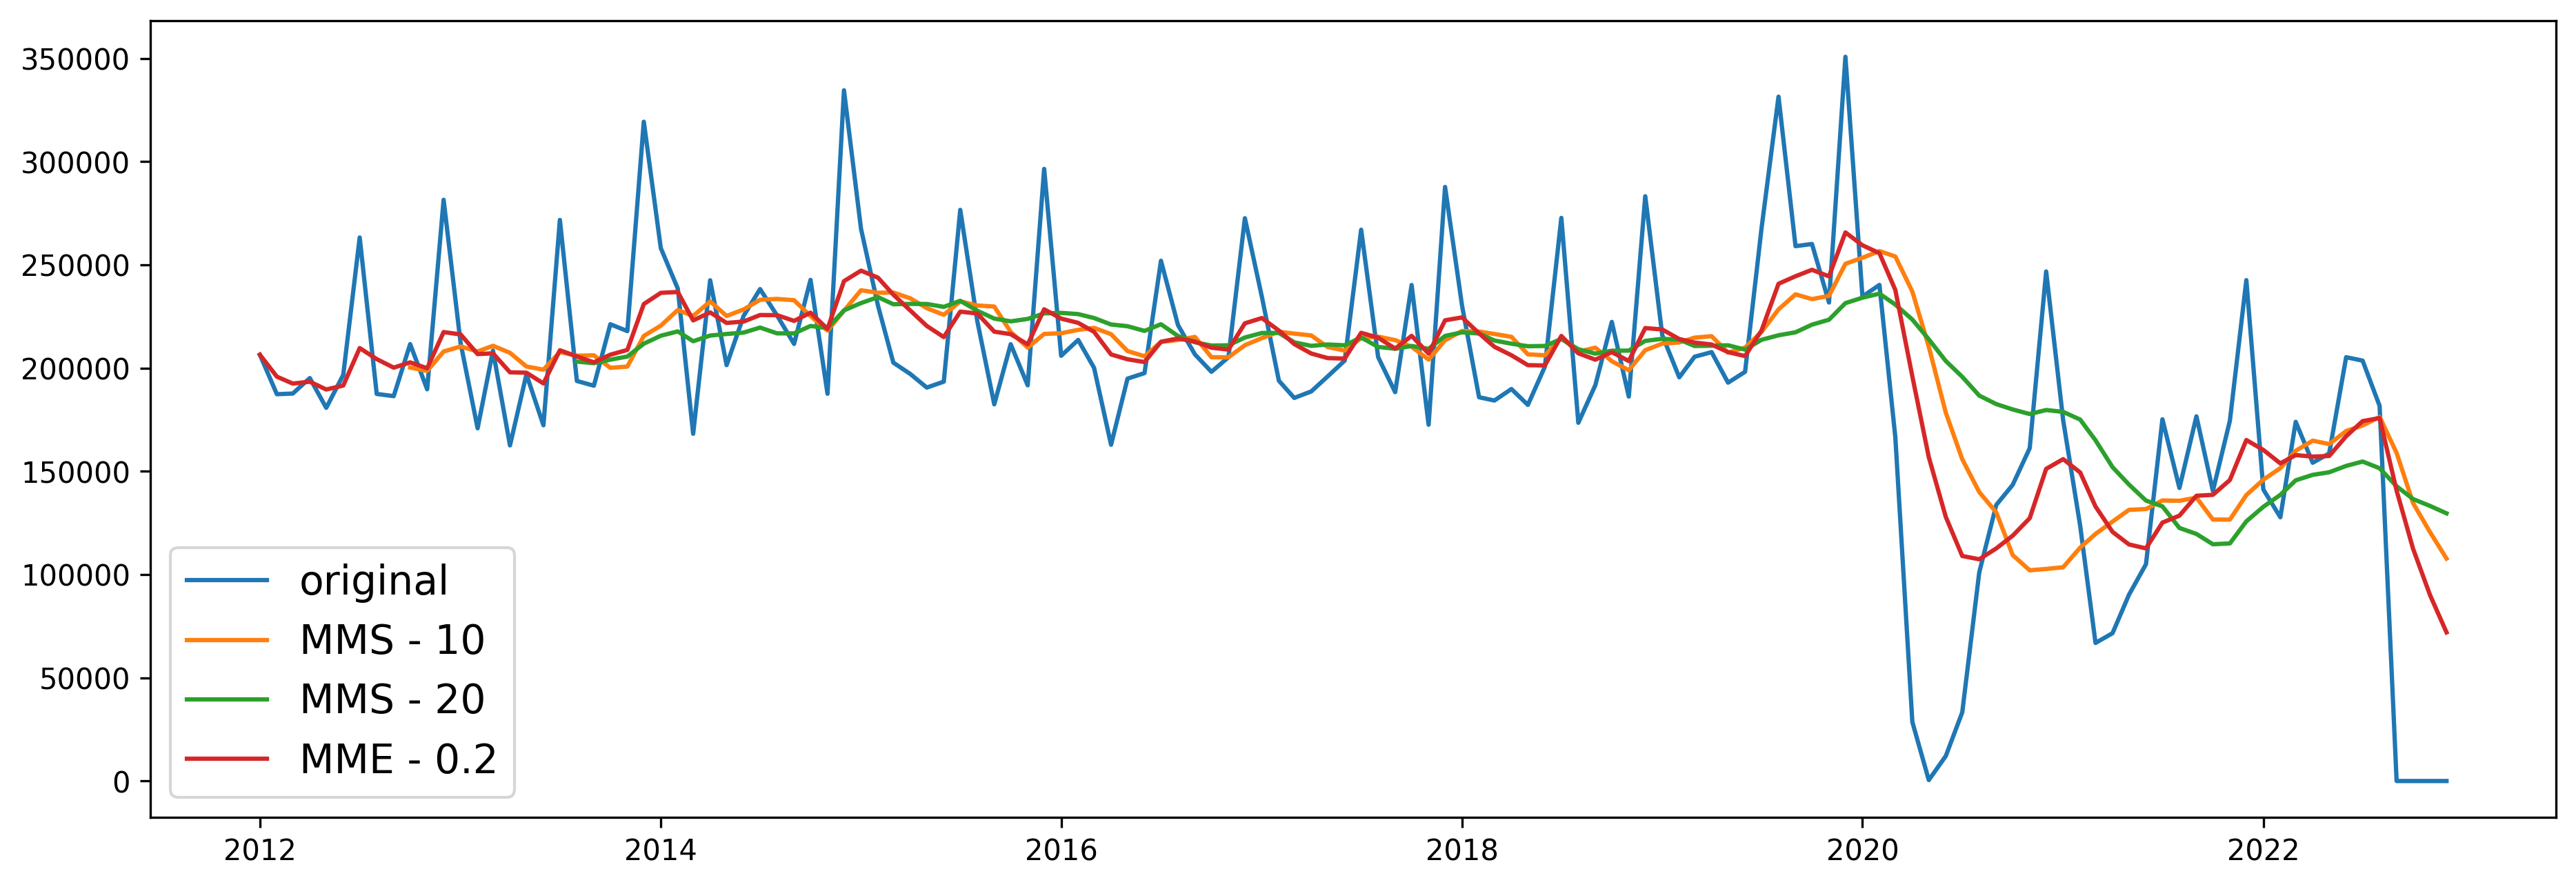

In [23]:
plt.figure(figsize=(15,5),dpi=300)
plt.plot(serie,label='original')
plt.plot(serie.rolling(10).mean(),label='MMS - 10')
plt.plot(serie.rolling(20).mean(),label='MMS - 20')
plt.plot(serie.ewm(alpha=0.2).mean(),label='MME - 0.2')
plt.legend(fontsize=14)

### b. O dado é estacionário?

In [26]:
is_stationary(serie.values)

/var/folders/hh/sy5ws2px2632l4y5ft5fb97r0000gp/T/ipykernel_26204/3090872550.py:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpssx=kpss(xx)


'A série NÃO é estacionária'

### c. O dado apresenta uma distribuição normal?

In [25]:
testenormal(serie.values)

'A série NÃO é normal'

## Cuidado !!! 

Exclua possíveis valores ausentes 